# fig — rotate (omni)

**Motivation**: host = ```mach```, device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
def _extract_model_type(name):
    mapping = {
        'SAVAE': 'sa-VAE',
        'MARINO-single': 'ia-VAE (single-level)',
        'MARINO-hier': 'ia-VAE (hierarchical)'
    }
    
    if '~' not in name:
        name = '~'.join(f.split('_')[:-1])
    model = name.split('~')[0]
    if 'hierarchical' in name:
        model = f"{model}-hier"
    elif 'single' in name:
        model = f"{model}-single"
    elif model == 'SAVAE':
        pass
    else:
        raise ValueError(name)

    model = mapping[model]
    return model

In [3]:
from analysis.chosen import *
from figures.analysis import *
from analysis.corrupt import (
    perform_corruption_analysis,
    LogisticRegression,
)

device_idx = 1
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:1  ———  host: mach

In [4]:
fig_base_dir = pjoin(fig_base_dir, 'iclr_oct02', 'rotate')
os.makedirs(fig_base_dir, exist_ok=True)
print(os.listdir(fig_base_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

['MNIST_<mlp|mlp>_(64,24.0)', 'MNIST_<jacob|mlp>_(64,24.0)']

## iP-VAE

In [5]:
models_to_load = selected_models_28x28(device)
models_to_load = {
    m: d for m, d in
    models_to_load.items()
    if m.startswith('Omni')
    and 'mlp' in m  # no conv
}
models_to_load = dict(sorted(
    models_to_load.items(),
    key=lambda t: alphanum_sort_key(t[0]),
))
print(list(models_to_load))

['Omniglot_<jacob|mlp>_(64,24.0)', 'Omniglot_<mlp|mlp>_(64,24.0)']

In [6]:
trainers = {}
for model_name, kws_load in models_to_load.items():
    trainers[model_name] = load_model(**kws_load)[0]

## Rotated files

In [7]:
load_dir = pjoin(tmp_dir, 'corrupted_data')
files = sorted(os.listdir(load_dir), key=alphanum_sort_key)

tgt_ds = 'Omniglot'
pat = 'rotate-angle'
thetas = np.arange(15, 180 + 1, 15)

file_paths = {}
for theta in thetas:
    f = next(
        f for f in files if (
            f.startswith(tgt_ds) and
            f"{pat}-{theta}" in f
        )
    )
    analysis_name = f.split('.')[0]
    key = (theta, analysis_name)
    file_paths[key] = pjoin(load_dir, f)

In [8]:
data = {}
for key, file in file_paths.items():
    corrupted_data = np.load(
        file, allow_pickle=True).item()
    data[key] = corrupted_data
    
    print({k: v for k, v in corrupted_data.items() if not k.startswith('x_')})

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 15, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 30, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 45, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 60, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 75, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 90, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 105, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 120, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 135, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 150, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 165, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 180, 'hist_match': True, 'interpolation': 'bilinear'}}

## Perform analysis

In [9]:
kws_analysis = dict(
    tr=None,
    corrupted_data=None,
    mse_wrt_orig=False,
    t_recon=None,
    verbose=False,
)

### init inds

In [10]:
inds = get_dataset_inds('Omniglot')
print(inds)

{'Omniglot': array([12985,  5691,  6315,   774, 11545, 11738,  8949, 12606,  4966,
        2897])}

### init df

In [11]:
df = collections.defaultdict(list)

### loop: our models

______________________________________________________________________________________________________________

Omniglot_<jacob|mlp>_(64,24.0)  ———     Omniglot_rotate-angle-15

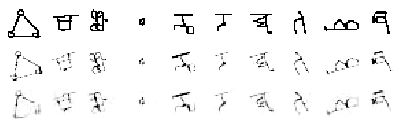

______________________________________________________________________________________________________________

Omniglot_<jacob|mlp>_(64,24.0)  ———     Omniglot_rotate-angle-30

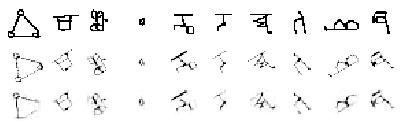

______________________________________________________________________________________________________________

Omniglot_<jacob|mlp>_(64,24.0)  ———     Omniglot_rotate-angle-45

In [ ]:
%%time


for model_name, tr in trainers.items():
    fig_dir = pjoin(fig_base_dir, model_name)
    os.makedirs(fig_dir, exist_ok=True)
    
    if tr.model.cfg.enc_type == 'jacob':
        is_ipvae = True
    else:
        is_ipvae = False
    t_recon = 1000 if is_ipvae else -1
    kws_analysis['t_recon'] = t_recon
    kws_analysis['tr'] = tr

    for (theta, analysis_name), corrupted_data in data.items():
        kws_analysis['corrupted_data'] = corrupted_data
        results, accuracy = perform_corruption_analysis(
            **kws_analysis)

        # save results
        df['analysis_name'].append(analysis_name)
        df['model'].append('iP-VAE' if is_ipvae else 'aiP-VAE')
        df['enc_type'].append(tr.model.cfg.enc_type)
        df['dec_type'].append(tr.model.cfg.dec_type)
        df['n_iters_train'].append(tr.model.cfg.seq_len)
        df['n_iters_test'].append(results['props']['t_recon'])
        df['theta'].append(theta)
        df['mse'].append(results['mse'].mean())
        df['accuracy'].append(accuracy.mean())

        # save figs
        x = tonp(tr.dl_vld.dataset.tensors[0][inds['Omniglot']])
        fig, ax = plot_row_or_col(x, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_inpt.png"), **kws_fig)
        
        x_corrupted = corrupted_data['x_corrupted_vld'][inds['Omniglot']]
        fig, ax = plot_row_or_col(x_corrupted, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_corrpt.png"), **kws_fig)

        x_recon = results['recon'][inds['Omniglot']]
        x_recon = x_recon.reshape(tr.model.cfg.shape)
        fig, ax = plot_row_or_col(x_recon, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_recon.png"), **kws_fig)

        # plot results
        print('_' * 110)
        print(f"{model_name}\t———\t{analysis_name}")
        _ = plot_weights(
            w=np.concatenate([x, x_corrupted, x_recon]),
            nrows=3, cmap='Greys',
            method='none', dpi=50,
            vmin=0.05, vmax=1,
        )
        print('\n\n')

# df = pd.DataFrame(df)
# save_obj(
#     obj=df,
#     file_name='df_rot',
#     save_dir=tmp_dir,
#     mode='df',
# )

## Marino & Kim

rotation results

In [ ]:
dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/rot_full'

dekel_files = sorted(
    os.listdir(dekel_dir),
    key=alphanum_sort_key,
)
selected_dekel_files = [
    f for f in dekel_files
    if '_Omniglot_' in f
    and 'rotate' in f
]
print(selected_dekel_files)

In [ ]:
len(selected_dekel_files) / 3

### loop: their models

In [ ]:
for f in selected_dekel_files:
    model_name = '~'.join(f.split('_')[:-1])
    load = dict(np.load(
        pjoin(dekel_dir, f),
        allow_pickle=True,
    ))

    analysis_name = next(
        e for e in f.split('_')
        if 'angle' in e
    )
    theta = int_from_str(analysis_name)
    assert theta % 15 == 0
    
    analysis_name = f"MNIST_{analysis_name}"
    n_iters = int_from_str(model_name.split('~')[-1])

    # prep dataset
    trn, vld, _ = make_dataset('Omniglot')
    g_trn, g_vld = map(
        lambda g: tonp(g).astype(int),
        [trn.tensors[1], vld.tensors[1]],
    )
    corrupted_data = data[(theta, analysis_name)]
    src = corrupted_data['x_corrupted_vld']

    # prep recon
    recon = load['recons_val'].squeeze()
    recon = recon[:, np.newaxis]
    assert recon.shape == src.shape
    if np.nanmax(recon) > 1:
        recon /= 255

    # compute mse
    mse = (src - recon) ** 2
    mse = np.sum(mse, axis=(1, 2, 3)).mean()

    # clf accuracy
    z_vld = load['posteriors_val'][:, 0, 0]
    z_trn = load['posteriors_trn'][:, 0, 0]
    clf = LogisticRegression().fit(z_trn, g_trn)
    accuracy = (clf.predict(z_vld) == g_vld).mean()

    # save results
    df['analysis_name'].append(analysis_name)
    df['model'].append(_extract_model_type(f))
    df['enc_type'].append('-')
    df['dec_type'].append('-')
    df['n_iters_train'].append(n_iters)
    df['n_iters_test'].append(n_iters)
    df['theta'].append(theta)
    df['mse'].append(mse)
    df['accuracy'].append(accuracy)

In [ ]:
df = pd.DataFrame(df)

save_obj(
    obj=df,
    file_name='df_rot_omni',
    save_dir=tmp_dir,
    mode='df',
)

In [ ]:
fig, axes = create_figure(2, 1, (10, 7), sharex='col')
for i, y_name in enumerate(['mse', 'accuracy']):
    sns.barplot(
        data=df,
        x='theta',
        y=y_name,
        hue='model',
        legend=i==0,
        palette=get_palette_models(),
        ax=axes[i],
    )
axes[-1].set_ylim((0.57, 1.0))
plt.show()

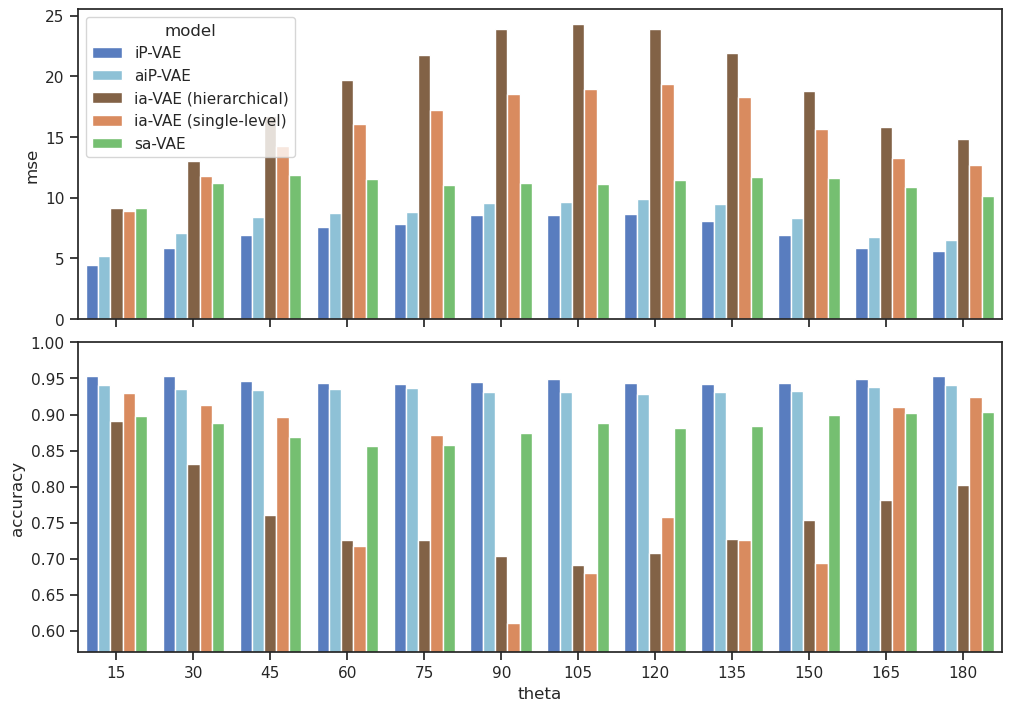